In [21]:
import pybamm
import matplotlib.pyplot as plt

In [35]:
options = {
    'operating mode': 'current'
    }
chemistry = pybamm.parameter_sets.Chen2020
parameters = pybamm.ParameterValues(chemistry=chemistry)

parameters.update(
    {
        "Cation transference number": 1.0,
        # "Positive electrode conductivity [S.m-1]": 0.20,
        # "Negative electrode conductivity [S.m-1]": 0.20,
        "Electrode cross-sectional area [m2]": 1e-4,
        "Positive electrode active material volume fraction": 0.70,
        "Negative electrode active material volume fraction": 0.70,
        'Positive electrode thickness [m]': 100e-06,
        "Negative electrode thickness [m]": 100e-6,
        "Separator thickness [m]": 50e-6,
        "Positive electrode porosity": 0.30,
        "Negative electrode porosity": 0.30,
        "Separator porosity": 1.0,
        "Positive particle radius [m]": 5e-6,
        "Negative particle radius [m]": 5e-6,
    },
    check_already_exists=False,
)

experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.5 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour"),
    ]
)
model = pybamm.lithium_ion.DFN(options=options)
sim = pybamm.Simulation(model=model, experiment=experiment, parameter_values=parameters)
sim.solve()

In [28]:
terminal_voltage = sim.solution['Terminal voltage [V]'].entries
current_density = sim.solution["Current [A]"].entries / parameters["Electrode cross-sectional area [m2]"]
time = sim.solution["Time [h]"].entries
pos_ocp = sim.solution["X-averaged positive electrode open circuit potential [V]"].entries
neg_ocp = sim.solution["X-averaged negative electrode open circuit potential [V]"].entries


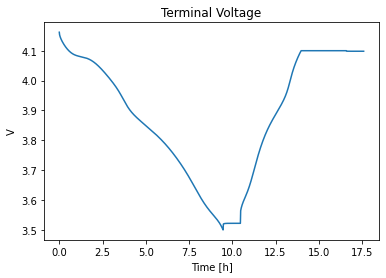

In [23]:
plt.plot(time, terminal_voltage)
plt.xlabel("Time [h]")
plt.ylabel("V")
plt.title("Terminal Voltage")
plt.show()

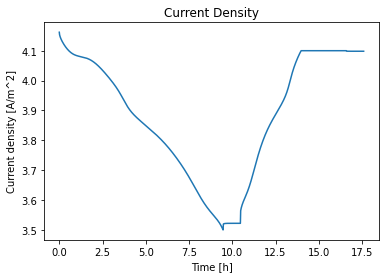

In [26]:
plt.plot(time, terminal_voltage)
plt.xlabel("Time [h]")
plt.ylabel(r'Current density [A/m^2]')
plt.title("Current Density")
plt.show()

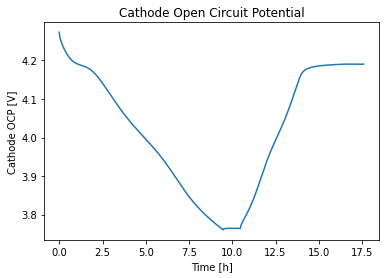

In [29]:
plt.plot(time, pos_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Cathode OCP [V]')
plt.title("Cathode Open Circuit Potential")
plt.show()

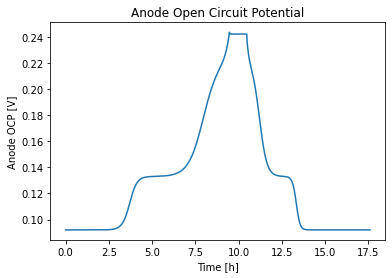

In [30]:
plt.plot(time, neg_ocp)
plt.xlabel("Time [h]")
plt.ylabel(r'Anode OCP [V]')
plt.title("Anode Open Circuit Potential")
plt.show()

In [36]:
# model.variables.search('conductivity')
(parameters["Negative electrode conductivity [S.m-1]"],
parameters["Positive electrode conductivity [S.m-1]"])

(215.0, 0.18)